# Efficient Frontier I

In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
import importlib
import sys
import numpy as np
import pandas as pd

sys.path.insert(1, "../../week-one")
erk = importlib.import_module("edhec-risk-kit")

In [3]:
industry_returns = pd.read_csv("../../data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True, na_filter=-99.99) / 100

industry_returns.index = pd.to_datetime(industry_returns.index, format="%Y%m").to_period("M")

industry_returns

/var/folders/sw/bxz8j14j0gn9_prt5kh2xc4m0000gn/T/ipykernel_30641/3838090959.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industry_returns = pd.read_csv("../../data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True, na_filter=-99.99) / 100


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
2018-11,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348


In [4]:
industry_returns.columns = industry_returns.columns.str.strip()

industry_returns.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [5]:
industry_returns = erk.get_industry_returns()

industry_returns.head()

/Users/mac/Desktop/development/algo-trading/coursera/introduction-to-portfolio-construction-and-analysis-with-python/week-two/section-one/../../week-one/edhec-risk-kit.py:59: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industry_returns = pd.read_csv(


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


<Axes: >

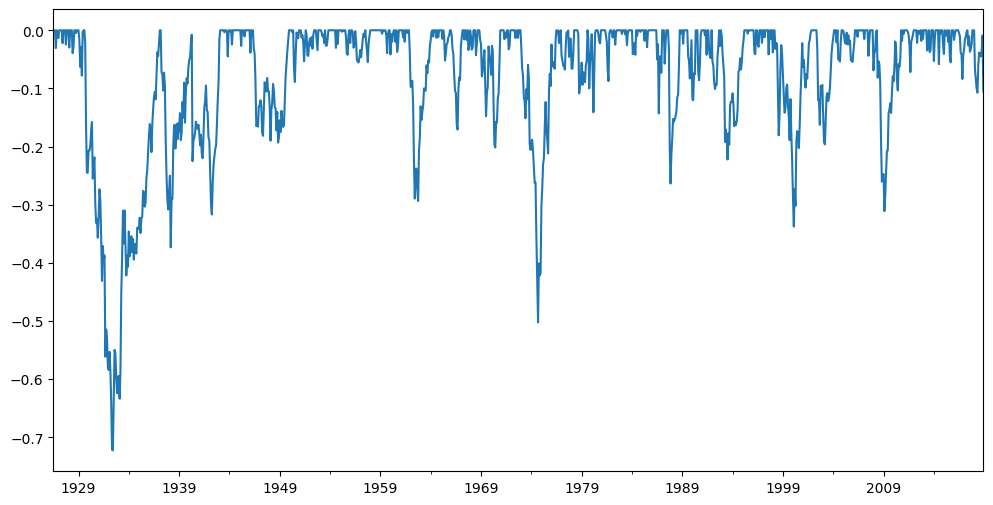

In [6]:
erk.create_drawdown(industry_returns["Food"])["Drawdown"].plot.line(figsize=(12, 6))

<Axes: >

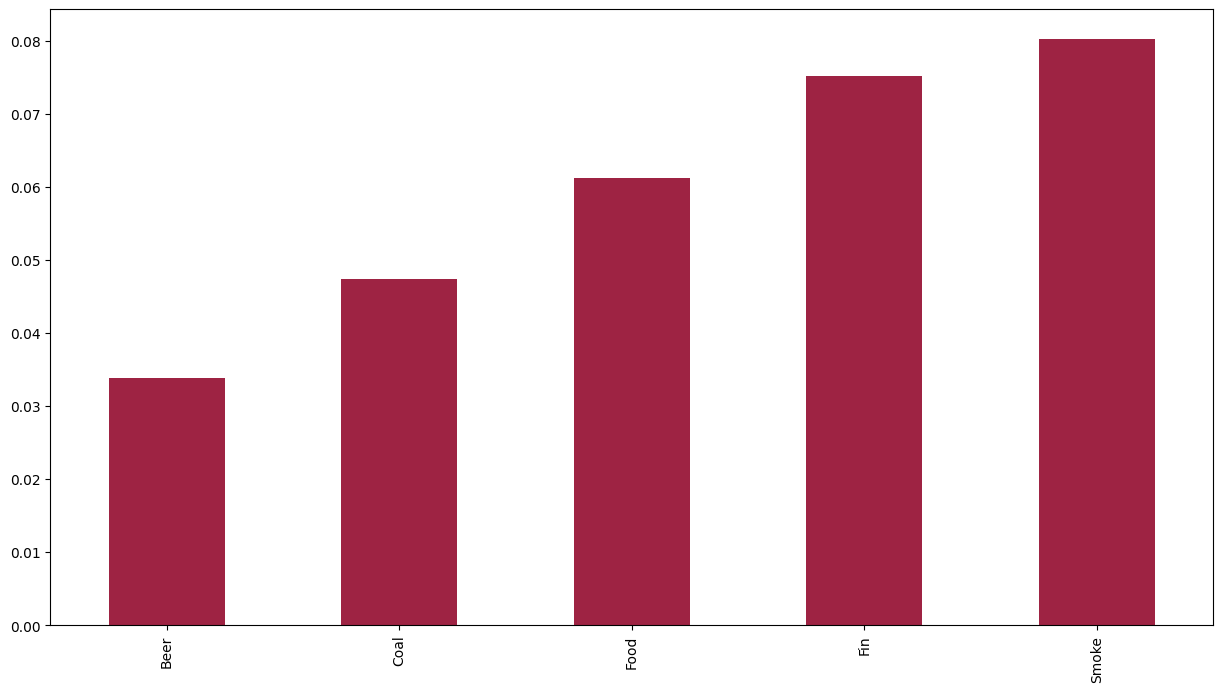

In [7]:
cols_of_interest = ["Food", "Smoke", "Coal", "Beer", "Fin"]
# Cornish-Fisher VaR
erk.var_gaussian(industry_returns[cols_of_interest], modified=True).sort_values().plot.bar(figsize=(15, 8), color="#9e2343")

<Axes: >

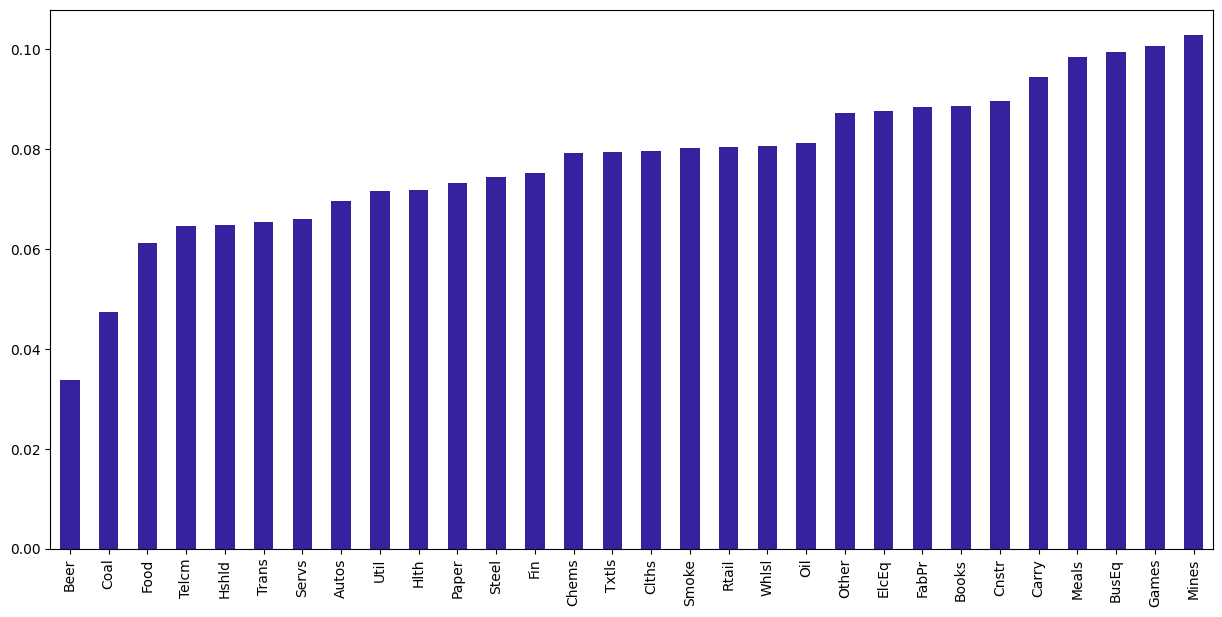

In [8]:
erk.var_gaussian(industry_returns, modified=True).sort_values().plot.bar(figsize=(15, 7), color="#34229e")

#### Let's plot the Sharpe Ratios of the various industries in our dataset and see the best and worst industries to be in

<Axes: title={'center': 'Industry Sharpe Ratios 1926-2018'}>

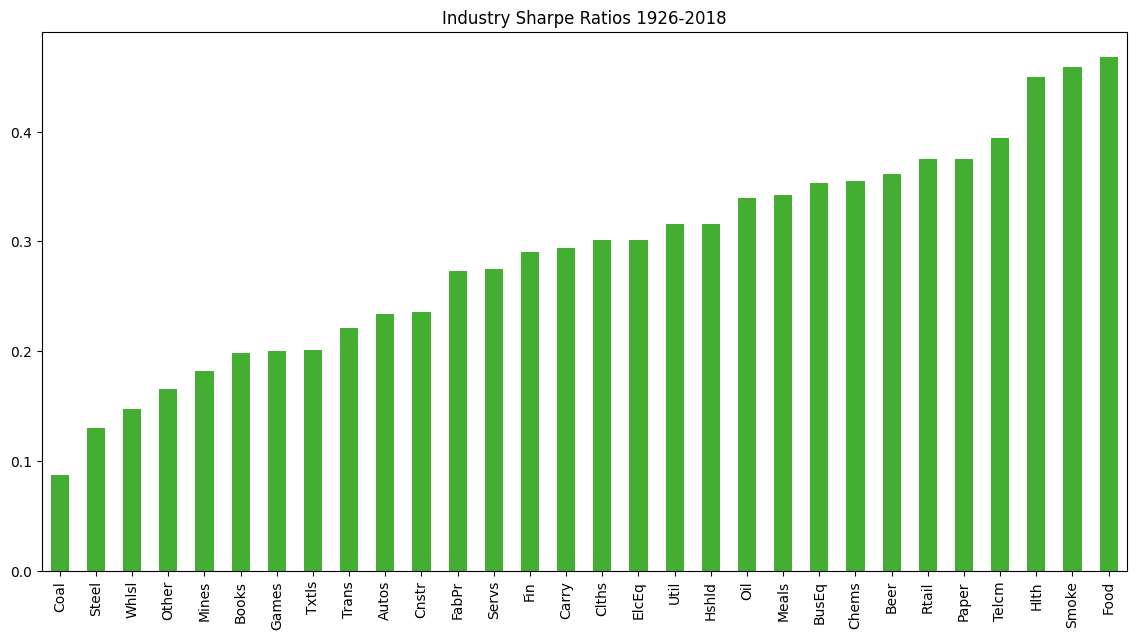

In [9]:
erk.sharpe_ratio(industry_returns).sort_values().plot.bar(figsize=(14, 7), color="#43ae32", title="Industry Sharpe Ratios 1926-2018")

<Axes: title={'center': 'Industry Sharpe Ratios 2000-2018'}>

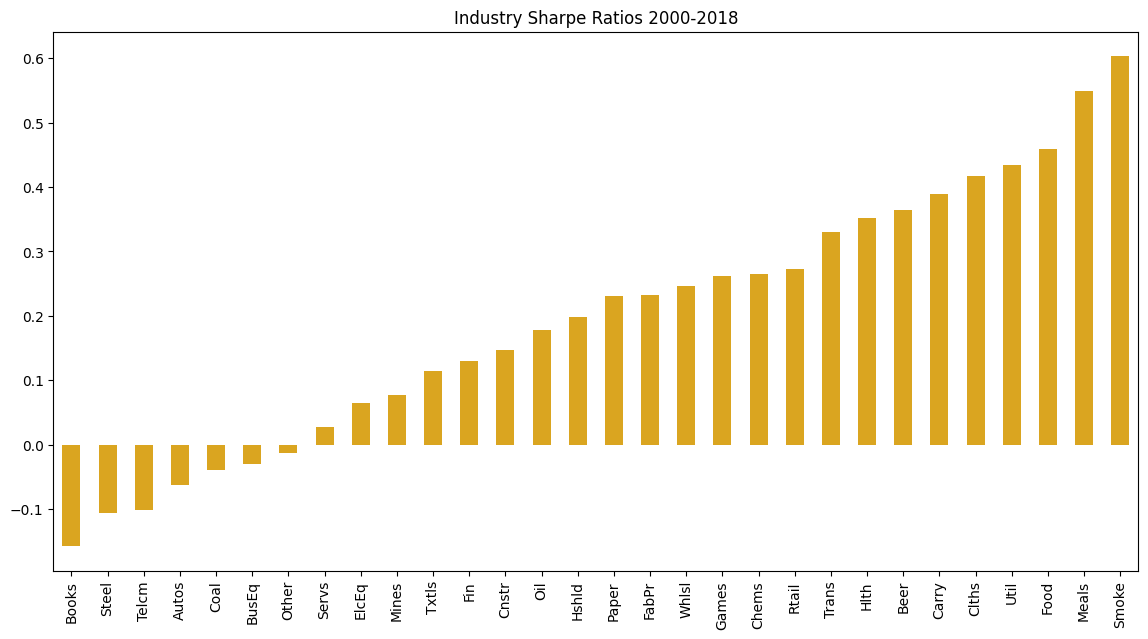

In [10]:
erk.sharpe_ratio(industry_returns["2000":]).sort_values().plot.bar(
    figsize=(14, 7), color="goldenrod", title="Industry Sharpe Ratios 2000-2018")

<Axes: >

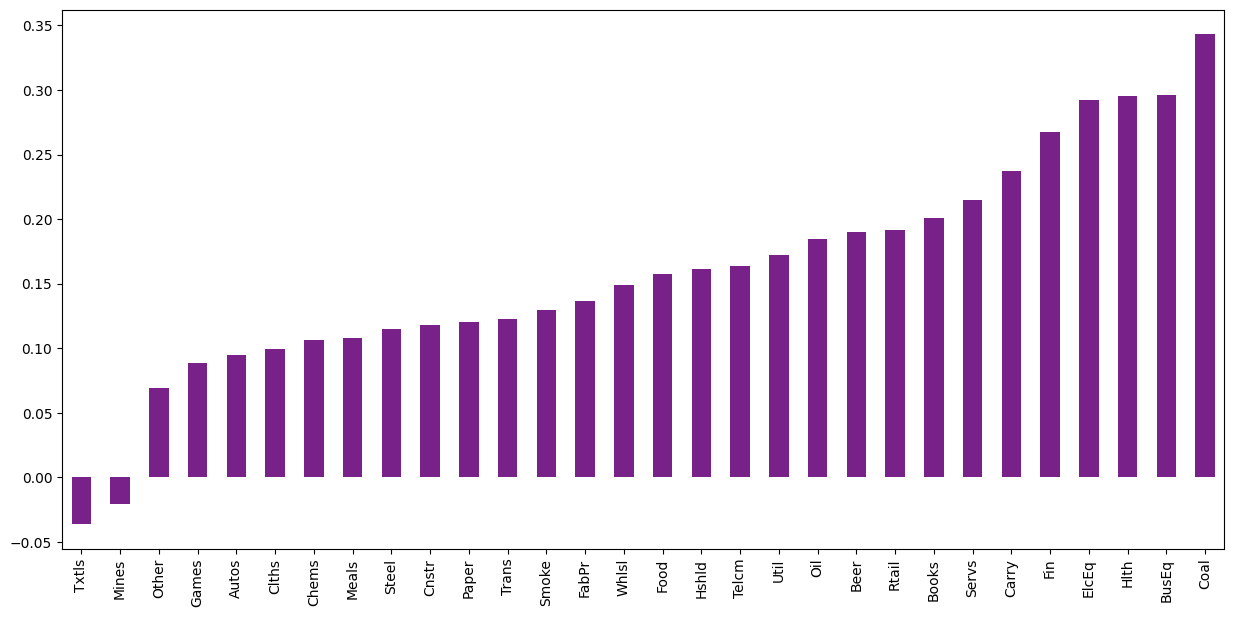

In [11]:
# expected returns though this is the real returns within that time frame
expected_return = erk.annualize_returns(industry_returns["1995":"2000"], months_per_year=12)

expected_return.sort_values().plot.bar(figsize=(15, 7), color="#782289")

In [12]:
cov = industry_returns["1995":"2000"].cov()

cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,...,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,...,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,...,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,...,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,...,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
Hshld,0.001208,0.002447,0.000981,0.001018,0.000876,0.002849,0.001046,0.001253,0.001226,0.001172,...,0.000889,0.001111,0.000906,0.001594,0.001366,0.000578,0.001157,0.001076,0.001652,0.001322
Clths,0.001474,0.001415,0.000761,0.001814,0.002037,0.001046,0.004896,0.000759,0.002547,0.002105,...,0.001263,0.001401,0.000746,0.002683,0.002466,0.001654,0.002607,0.002229,0.002699,0.001974
Hlth,0.001105,0.001689,0.000877,0.001219,0.000657,0.001253,0.000759,0.002252,0.000444,0.000538,...,0.001093,0.001390,0.001264,0.000552,0.000880,0.000907,0.000770,0.000900,0.001412,0.001099
Chems,0.001253,0.001292,0.000687,0.001547,0.001559,0.001226,0.002547,0.000444,0.002944,0.001705,...,0.000860,0.001072,0.000935,0.002581,0.001966,0.001257,0.001661,0.001425,0.002143,0.001832
Txtls,0.001021,0.001721,0.000555,0.001291,0.001362,0.001172,0.002105,0.000538,0.001705,0.002882,...,0.000790,0.000582,0.000685,0.001869,0.001760,0.001426,0.001696,0.001126,0.001789,0.001668


# Efficient Frontier II

In [13]:
expected_return = erk.annualize_returns(industry_returns["1996":"2000"], 12)

cov = industry_returns["1996":"2000"].cov()

In [14]:
def portfolio_return(weights, expected_return):
    """
    Weights -> Returns
    """
    return weights.T @ expected_return

def portfolio_volatility(weights, covariance_matrix):
    """
    Weights -> Volatility
    """
    return (weights.T @ covariance_matrix @ weights) ** 0.5

In [15]:
assets_of_interest = ["Food", "Beer", "Smoke", "Coal"]

expected_return[assets_of_interest]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [16]:
cov.loc[assets_of_interest, assets_of_interest]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [17]:
weights = np.repeat(1/4, 4)

weights

array([0.25, 0.25, 0.25, 0.25])

In [18]:
portfolio_return(weights, expected_return=expected_return[assets_of_interest])

0.19511097196038385

In [19]:
portfolio_volatility(weights, cov.loc[assets_of_interest, assets_of_interest])

0.055059195776437045

## 2 Asset Frontier

In [20]:
import matplotlib.pyplot as plt

assets_of_interest = ["Games", "Fin"]
n_points = 20

weights = [np.array([1-w, w]) for w in np.linspace(0, 1, n_points)]
portfolio_returns = [portfolio_return(weight, expected_return[assets_of_interest]) for weight in weights]
portfolio_volatilities = [portfolio_volatility(weight, cov.loc[assets_of_interest, assets_of_interest]) for weight in weights]

In [21]:
portfolio_returns

[0.06821154829264198,
 0.07637785803690084,
 0.0845441677811597,
 0.09271047752541856,
 0.10087678726967743,
 0.10904309701393629,
 0.11720940675819515,
 0.12537571650245402,
 0.13354202624671288,
 0.14170833599097174,
 0.1498746457352306,
 0.15804095547948946,
 0.16620726522374832,
 0.17437357496800715,
 0.18253988471226607,
 0.19070619445652492,
 0.19887250420078378,
 0.20703881394504262,
 0.2152051236893015,
 0.22337143343356036]

In [22]:
portfolio_volatilities

[0.061423159933946626,
 0.06031640142594412,
 0.059325572647323514,
 0.058456568862214876,
 0.05771489323047962,
 0.05710550711027121,
 0.05663268109748637,
 0.05629985593685589,
 0.05610952301512326,
 0.05606313362372235,
 0.05616104445868889,
 0.056402504039475894,
 0.05678568123574939,
 0.05730773341483651,
 0.05796490842860513,
 0.058752672223312284,
 0.05966585256137839,
 0.06069878923524834,
 0.06184548206317772,
 0.0630997295785121]

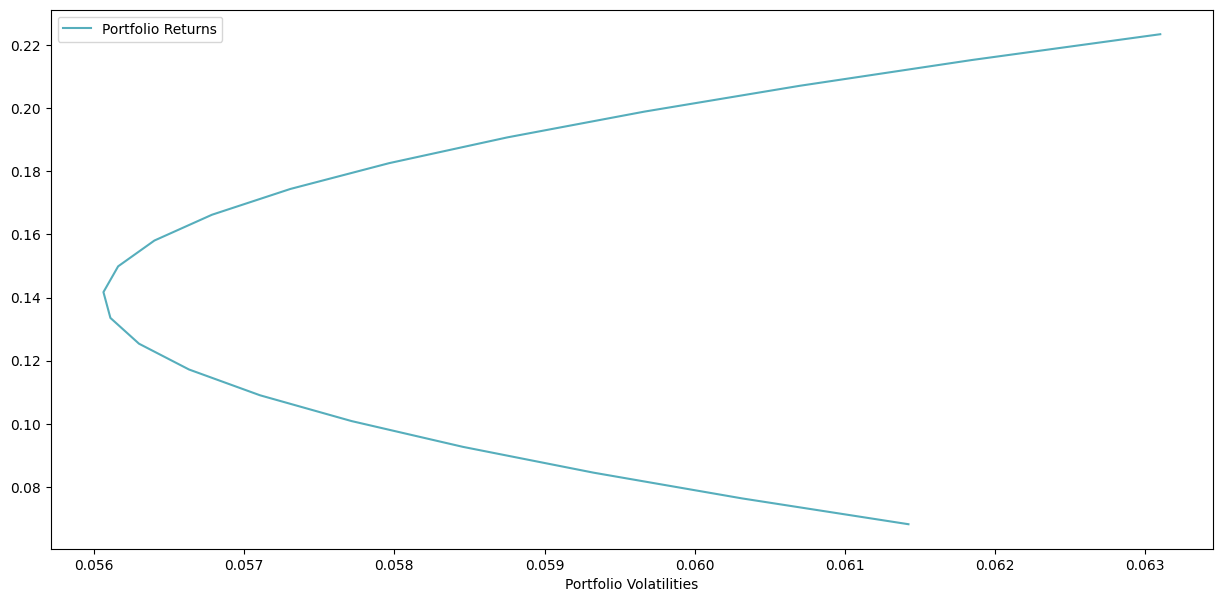

In [23]:
df_portfolio = pd.DataFrame(data={
    "Portfolio Returns": portfolio_returns,
    "Portfolio Volatilities": portfolio_volatilities
})

df_portfolio.plot(color="#56aebc", x="Portfolio Volatilities", y="Portfolio Returns", figsize=(15, 7))

plt.show()

<Axes: xlabel='Portfolio Volatilities'>

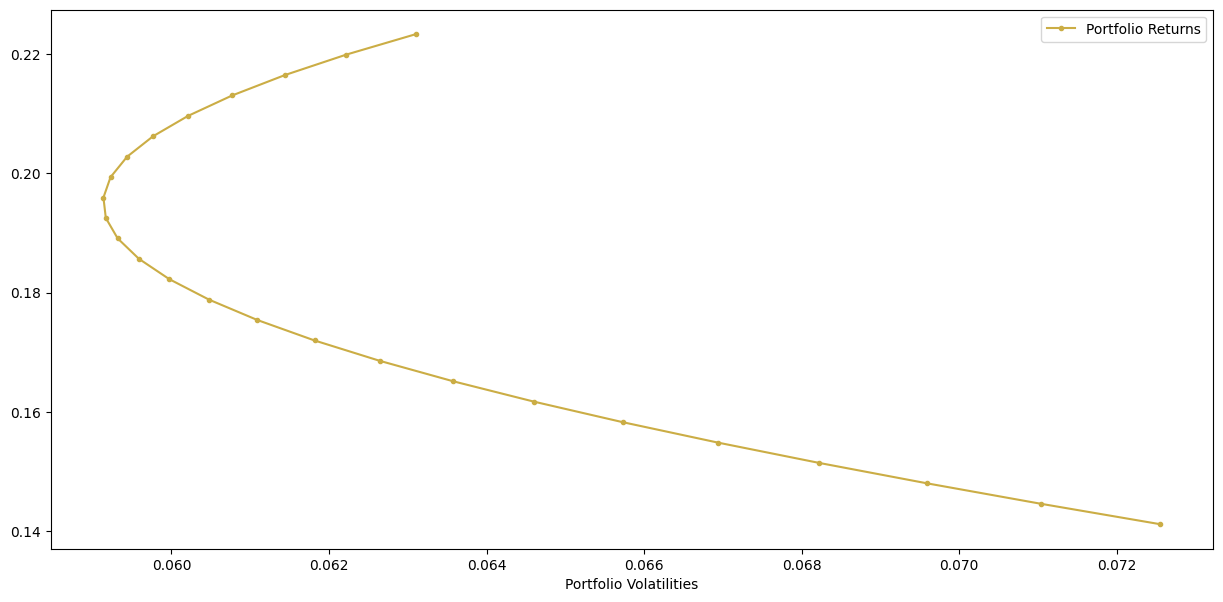

In [24]:
assets_of_interest = ["Fin", "Beer"]

erk.plot_efficient_frontier(n_points=25, expected_return=expected_return[assets_of_interest], covariance_matrix=cov.loc[assets_of_interest, assets_of_interest])

## N-Asset Efficient Frontier

<Axes: xlabel='Portfolio Volatilities'>

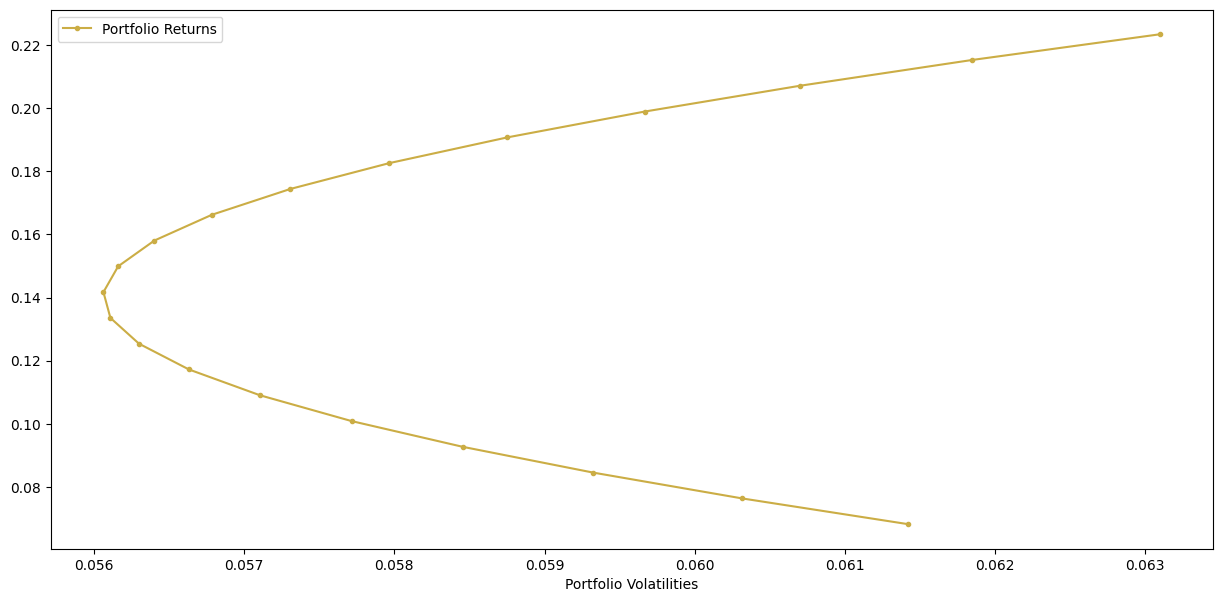

In [25]:
from scipy.optimize import minimize

assets_of_interest = ["Games", "Fin"]
erk.plot_efficient_frontier(20, expected_return[assets_of_interest], cov.loc[assets_of_interest, assets_of_interest])

In [28]:
def minimize_volatility(target_return, expected_return, cov):
    """
    target_return -> Weight vector
    """
    # let's figure out how many assets we have
    n_of_assets = expected_return.shape[0]
    # let's give it an initial guess (for the weights)
    init_guess = np.repeat(1/n_of_assets, n_of_assets)
    # constraints
    """
    bounds:
        * weights must not exceed 1 (exceeding 1 would mean there's some sort of leverage)
        * weights must not be -ve (that would be the equivalent of shorting)
    """
    # bounds #1
    bounds = ((0.0, 1.0),) * n_of_assets
    # constraint #1: highest return for the least volatility
    return_is_target = {
        'type': 'eq',
        'args': (expected_return,),
        'fun': lambda weights, expected_return: target_return - erk.portfolio_return(weights, expected_return)
    }
    # constraint #2: weight sum to one
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: 1 - np.sum(weights)
    }

    # let's get the weights that would yield the lowest volatility for a particular return
    result = minimize(erk.portfolio_volatility, init_guess, args=(cov,), method="SLSQP", bounds=bounds, constraints=[return_is_target, weights_sum_to_1], options={"disp": True})

    print(result)

    return result.x

In [29]:
weight_15_percent_return = minimize_volatility(
    0.15, expected_return[assets_of_interest], cov.loc[assets_of_interest,assets_of_interest])

weight_15_percent_return


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.056163669406706564
            Iterations: 2
            Function evaluations: 6
            Gradient evaluations: 2
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.056163669406706564
       x: [ 4.729e-01  5.271e-01]
     nit: 2
     jac: [ 5.444e-02  5.771e-02]
    nfev: 6
    njev: 2


array([0.47287631, 0.52712369])

In [30]:
volatility_15_percent_return = erk.portfolio_volatility(
    weight_15_percent_return, cov.loc[assets_of_interest, assets_of_interest])

volatility_15_percent_return

0.056163669406706564

### Let's generate an Efficient Frontier for an N - asset (4-asset) portfolio

In [31]:
def optimal_weights(n_points, expected_return, cov):
    """
    Generates a list of weights to run optimizer (to minimize the volatility)
    """
    target_returns = np.linspace(expected_return.min(), expected_return.max(), n_points)
    weights = [minimize_volatility(target_return ,expected_return, cov) for target_return in target_returns]

    return weights


def plot_efficient_frontier(n_points, expected_return, cov):
    """
    Plots the multi-asset efficient frontier
    """
    weights = optimal_weights(n_points, expected_return, cov)
    portfolio_returns = [erk.portfolio_return(weight, expected_return) for weight in weights]
    portfolio_volatilities = [erk.portfolio_volatility(weight, cov) for weight in weights]

    df_portfolio = pd.DataFrame(data={
        'Portfolio Returns': portfolio_returns,
        'Portfolio Volatilities': portfolio_volatilities
    })

    df_portfolio.plot(kind="line", x="Portfolio Volatilities", y="Portfolio Returns", color="#469dab", style=".-")

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.06142315993360179
            Iterations: 3
            Function evaluations: 15
            Gradient evaluations: 3
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.06142315993360179
       x: [ 6.242e-12  0.000e+00  1.000e+00  8.782e-18]
     nit: 3
     jac: [ 6.175e-03  3.933e-02  6.142e-02  3.074e-02]
    nfev: 15
    njev: 3
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.052275426937834504
            Iterations: 5
            Function evaluations: 25
            Gradient evaluations: 5
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.052275426937834504
       x: [ 2.826e-01  3.775e-04  7.079e-01  9.188e-03]
     nit: 5
     jac: [ 5.014e-02  4.035e-02  5.349e-02  2.490e-02]
    nfev: 25
    njev: 5
Optimization terminated successfully    (Exit mode 0)
            Current 

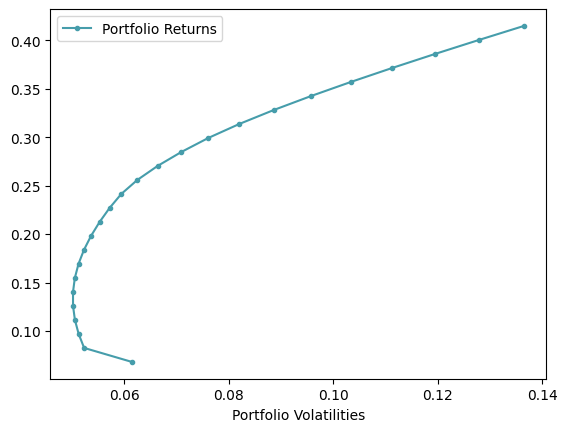

In [32]:
assets_of_interest = ["Smoke", "Fin", "Games", "Coal"]

plot_efficient_frontier(25, expected_return=expected_return[assets_of_interest], cov=cov.loc[assets_of_interest, assets_of_interest])